# **21BAI1272**

In [ ]:
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
pd.options.mode.chained_assignment = None

# **Question 1**

In [ ]:
file=pd.read_csv("/content/drive/MyDrive/Iris.csv")
file=file.sample(frac=1)
file


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
142,143,5.8,2.7,5.1,1.9,Iris-virginica
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
10,11,5.4,3.7,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...
14,15,5.8,4.0,1.2,0.2,Iris-setosa
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
138,139,6.0,3.0,4.8,1.8,Iris-virginica
53,54,5.5,2.3,4.0,1.3,Iris-versicolor


In [ ]:
train=file.iloc[:int(len(file)*0.8),1:]
test=file.iloc[int(len(file)*0.8):,1:]
labels=np.array(test.iloc[:,-1])
test=test.iloc[:,:-1]

In [ ]:
def swap_rows(df, row1, row2):
    df.iloc[row1], df.iloc[row2] =  df.iloc[row2].copy(), df.iloc[row1].copy()
    return df

In [ ]:
def euclideanDistance(row1, row2):
    tot=0
    for i in range(len(row1)):
        tot+=(row1[i]-row2[i])**2
    
    return tot**0.5

In [ ]:
def manhattanDistance(row1,row2):
    tot=0
    for i in range(len(row1)):
        tot+=row1[i]-row2[i]
    
    return tot

In [ ]:
def bubbleSort(df,start,euc):
    n=len(df)
    swapped=False
    for i in range(n-1):
        for j in range(0,n-i-1):
            p1=np.array(df.iloc[j,:-1])
            p2=np.array(df.iloc[j+1,:-1])
            if euc==True:
                p1Nearest=euclideanDistance(p1,start)
                p2Nearest=euclideanDistance(p2,start)
            else:
                p1Nearest=manhattanDistance(p1,start)
                p2Nearest=manhattanDistance(p2,start)
                
            if p1Nearest>p2Nearest:
                swapped=True
                df=swap_rows(df,j,j+1)
    
    return df

In [ ]:
def pred(train,test,k,labels,euc):
    PA=[]
    for i in range(len(test)):
        start=np.array(test.iloc[i])
        FD=bubbleSort(train,start,euc)
        results=list(FD.iloc[0:k,-1])
        predicted=max(set(results),key=results.count)
        if labels[i]==predicted:
            PA.append(True)
            continue
        PA.append(False)
    return PA

In [ ]:
encoder=LabelEncoder()

In [ ]:
cols=list(file.columns)
features=cols[:-1]
label=cols[-1]
x=file[features].values
y=file[label].values
y=encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# **Question2**

In [ ]:
for i in range(1,12,2):
    predicted=pred(train.copy(),test,i,labels,True)
    knn_algo_score_euclidean=(predicted.count(True)/len(predicted))*100
    predicted=pred(train.copy(),test,i,labels,False)
    knn_algo_score_manhattan=(predicted.count(True)/len(predicted))*100
    knn_class= KNeighborsClassifier(n_neighbors=i)
    knn_class.fit(X_train,y_train)
    knn_class_score=knn_class.score(X_test,y_test)*100
    print(f"k={i}, knn_euclidean_algo_score={round(knn_algo_score_euclidean,3)}, knn_manhattan_algo_score={round(knn_algo_score_manhattan,3)}, knn_classifier_score={knn_class_score}")

k=1, knn_euclidean_algo_score=86.667, knn_manhattan_algo_score=30.0, knn_classifier_score=100.0
k=3, knn_euclidean_algo_score=83.333, knn_manhattan_algo_score=30.0, knn_classifier_score=100.0
k=5, knn_euclidean_algo_score=86.667, knn_manhattan_algo_score=30.0, knn_classifier_score=100.0
k=7, knn_euclidean_algo_score=86.667, knn_manhattan_algo_score=30.0, knn_classifier_score=100.0
k=9, knn_euclidean_algo_score=90.0, knn_manhattan_algo_score=30.0, knn_classifier_score=100.0
k=11, knn_euclidean_algo_score=93.333, knn_manhattan_algo_score=30.0, knn_classifier_score=100.0


In [ ]:
auxilaryIris=file[["SepalLengthCm","SepalWidthCm"]]
auxilaryIris=auxilaryIris.sample(frac=1)
train=auxilaryIris.iloc[:int(len(auxilaryIris)*0.8)]
test=auxilaryIris.iloc[int(len(auxilaryIris)*0.8):]
labels=np.array(test.iloc[:,-1])
x=auxilaryIris["SepalLengthCm"].values
y=file["SepalWidthCm"].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
X_train=np.array(X_train).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [ ]:
def predreg(train,test,k,labels,euc):
    PA=[]
    difference=[]
    for i in range(len(test)):
        start=np.array(test.iloc[i])
        FD=bubbleSort(train,start,euc)
        results=list(FD.iloc[0:k,-1])
        predicted=sum(results)/len(results)
        PA.append(predicted)
        
    rmse=math.sqrt(mean_squared_error(labels,PA))
    return rmse

In [ ]:
euc=[]
man=[]
kn=[]
for i in range(1,16,2):
    euclidean_score=predreg(train,test,i,labels,True)
    manhattan_score=predreg(train,test,i,labels,False)
    knn_reg=KNeighborsRegressor(n_neighbors = i)
    knn_reg.fit(X_train,y_train)
    pred=knn_reg.predict(X_test)
    rmse=math.sqrt(mean_squared_error(labels,pred))
    euc.append(euclidean_score)
    man.append(manhattan_score)
    kn.append(rmse)
    print(f"k={i} knn_euclidean_algo_rmsd={round(euclidean_score,2)}, knn_manhattan_algo_rmsd={round(manhattan_score,2)}, knn_reg_rmsd={rmse}")

k=1 knn_euclidean_algo_rmsd=0.47, knn_manhattan_algo_rmsd=0.36, knn_reg_rmsd=0.6762642481555071
k=3 knn_euclidean_algo_rmsd=0.38, knn_manhattan_algo_rmsd=0.36, knn_reg_rmsd=0.4267881771419496
k=5 knn_euclidean_algo_rmsd=0.37, knn_manhattan_algo_rmsd=0.38, knn_reg_rmsd=0.41130686030424213
k=7 knn_euclidean_algo_rmsd=0.38, knn_manhattan_algo_rmsd=0.36, knn_reg_rmsd=0.41854948747954257
k=9 knn_euclidean_algo_rmsd=0.38, knn_manhattan_algo_rmsd=0.37, knn_reg_rmsd=0.4033348637865055
k=11 knn_euclidean_algo_rmsd=0.41, knn_manhattan_algo_rmsd=0.37, knn_reg_rmsd=0.3843028821569776
k=13 knn_euclidean_algo_rmsd=0.4, knn_manhattan_algo_rmsd=0.38, knn_reg_rmsd=0.37720031666935744
k=15 knn_euclidean_algo_rmsd=0.39, knn_manhattan_algo_rmsd=0.38, knn_reg_rmsd=0.38419709448069406


<Axes: >

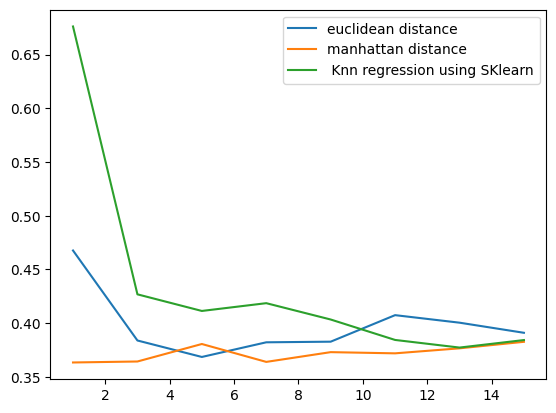

In [ ]:
curve=pd.DataFrame(index=[1,3,5,7,9,11,13,15])
curve['euclidean distance']=euc
curve['manhattan distance']=man
curve[' Knn regression using SKlearn']=kn
curve.plot()